In [1]:
#import important libraly
from scipy import stats
import pylab
import numpy as np  #create array
import pandas as pd  # data processing  (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.cm import get_cmap
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# import file csv
df = pd.read_csv('/Users/chalee/Desktop/spotify analyse/top50.csv', encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
df.shape #calculate  rows and columns

(50, 14)

# CLEAN DATA 🧹🧹

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [5]:
# Rename column
# delete symbol not important because it confuse.
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Genre':'genre','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'loudness(dB)','Valence.':'valence','Length.':'length', 'Acousticness..':'acousticness','Speechiness.':'speechiness'},inplace=True)
df.info()  #check again 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   track_name        50 non-null     object
 2   artist_name       50 non-null     object
 3   genre             50 non-null     object
 4   beats_per_minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   loudness(dB)      50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   valence           50 non-null     int64 
 10  length            50 non-null     int64 
 11  acousticness      50 non-null     int64 
 12  speechiness       50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


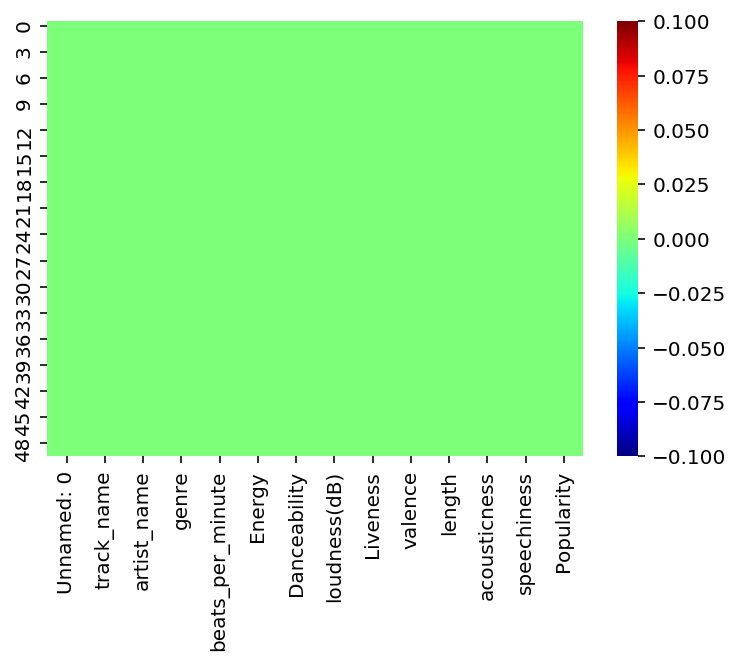

In [6]:
#check null with heatmap
sns.heatmap(df.isnull(),cmap="jet")

In [7]:
# check null  and fill na
df.isnull()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,genre,beats_per_minute,Energy,Danceability,loudness(dB),Liveness,valence,length,acousticness,speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [8]:
#check types
df.dtypes

Unnamed: 0           int64
track_name          object
artist_name         object
genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
loudness(dB)         int64
Liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
Popularity           int64
dtype: object

In [9]:
# dedicated 'string' in data types (pandas 1.00 or more)
df['track_name'] = df['track_name'].astype('string')
df['artist_name'] = df['artist_name'].astype('string')
df['genre'] = df['genre'].astype('string')

In [10]:
df.dtypes

Unnamed: 0           int64
track_name          string
artist_name         string
genre               string
beats_per_minute     int64
Energy               int64
Danceability         int64
loudness(dB)         int64
Liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
Popularity           int64
dtype: object

In [11]:
# use groupby to calculate each genre
popular_genre = df.groupby('genre').size()
genre_list= df['genre'].tolist()
popular_genre

genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64

In [12]:
# use groupby to calculate each artist 
artist = df.groupby('artist_name').size()

artist_list = df['artist_name'].tolist()


In [13]:
artist

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64

In [14]:
pd.set_option('precision', 3)
df.describe()

,Unnamed: 0,beats_per_minute,Energy,Danceability,loudness(dB),Liveness,valence,length,acousticness,speechiness,Popularity
count,50.000,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,25.500,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,14.577,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,1.000,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,13.250,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,25.500,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,37.750,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,50.000,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


Unnamed: 0          0.000
beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
loudness(dB)       -0.832
Liveness            2.204
valence            -0.046
length              0.749
acousticness        1.135
speechiness         1.378
Popularity         -1.503
dtype: float64


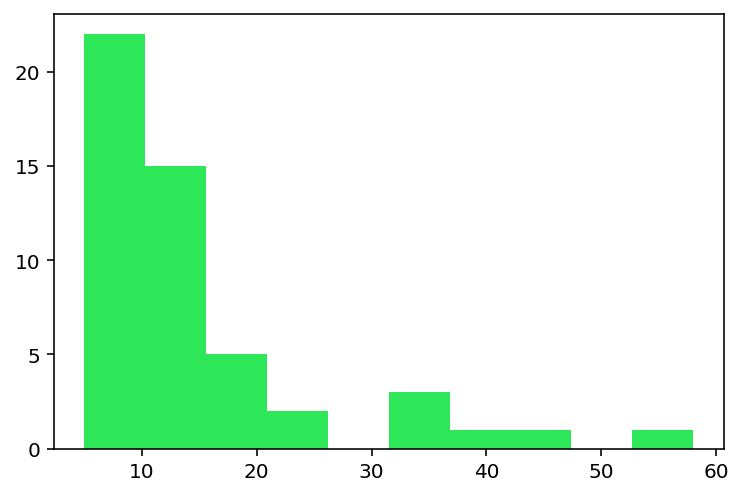

In [15]:
#check skew
skew=df.skew()
print(skew)

plt.hist(df['Liveness'],bins=10, color ='#2EE759') #original data
plt.show()


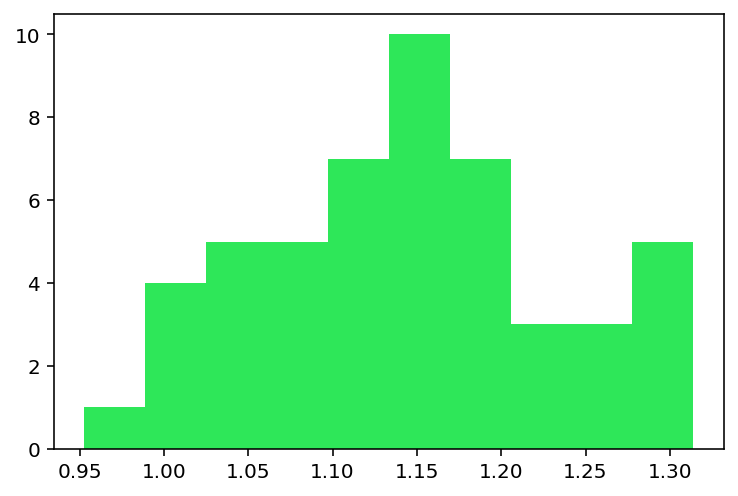

In [16]:
#Remove skew using boxcox  
df_transform = stats.boxcox(df['Liveness'])[0]
plt.hist(df_transform,bins=10 ,color ='#2EE759') #corrected skew data
plt.show()

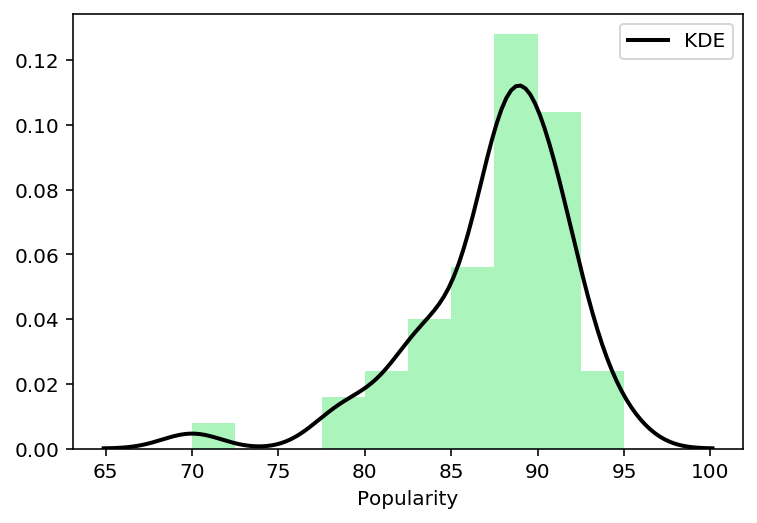

In [17]:
 sns.distplot(df['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='#2EE759')
plt.show()

In [18]:
colormap = cm.get_cmap('jet')

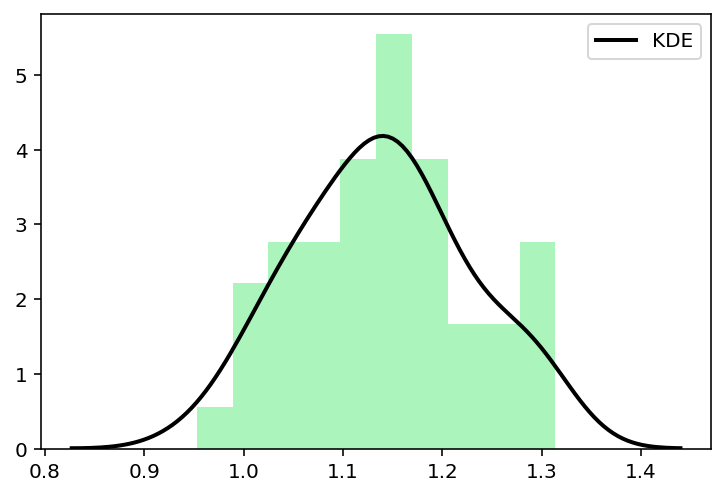

In [19]:
#Remove skew using boxcox
df_transform = stats.boxcox(df['Liveness'])[0]  
sns.distplot(df_transform,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color= '#2EE759')
plt.show()

In [20]:
viridis = cm.get_cmap('viridis', 12)
print(viridis)

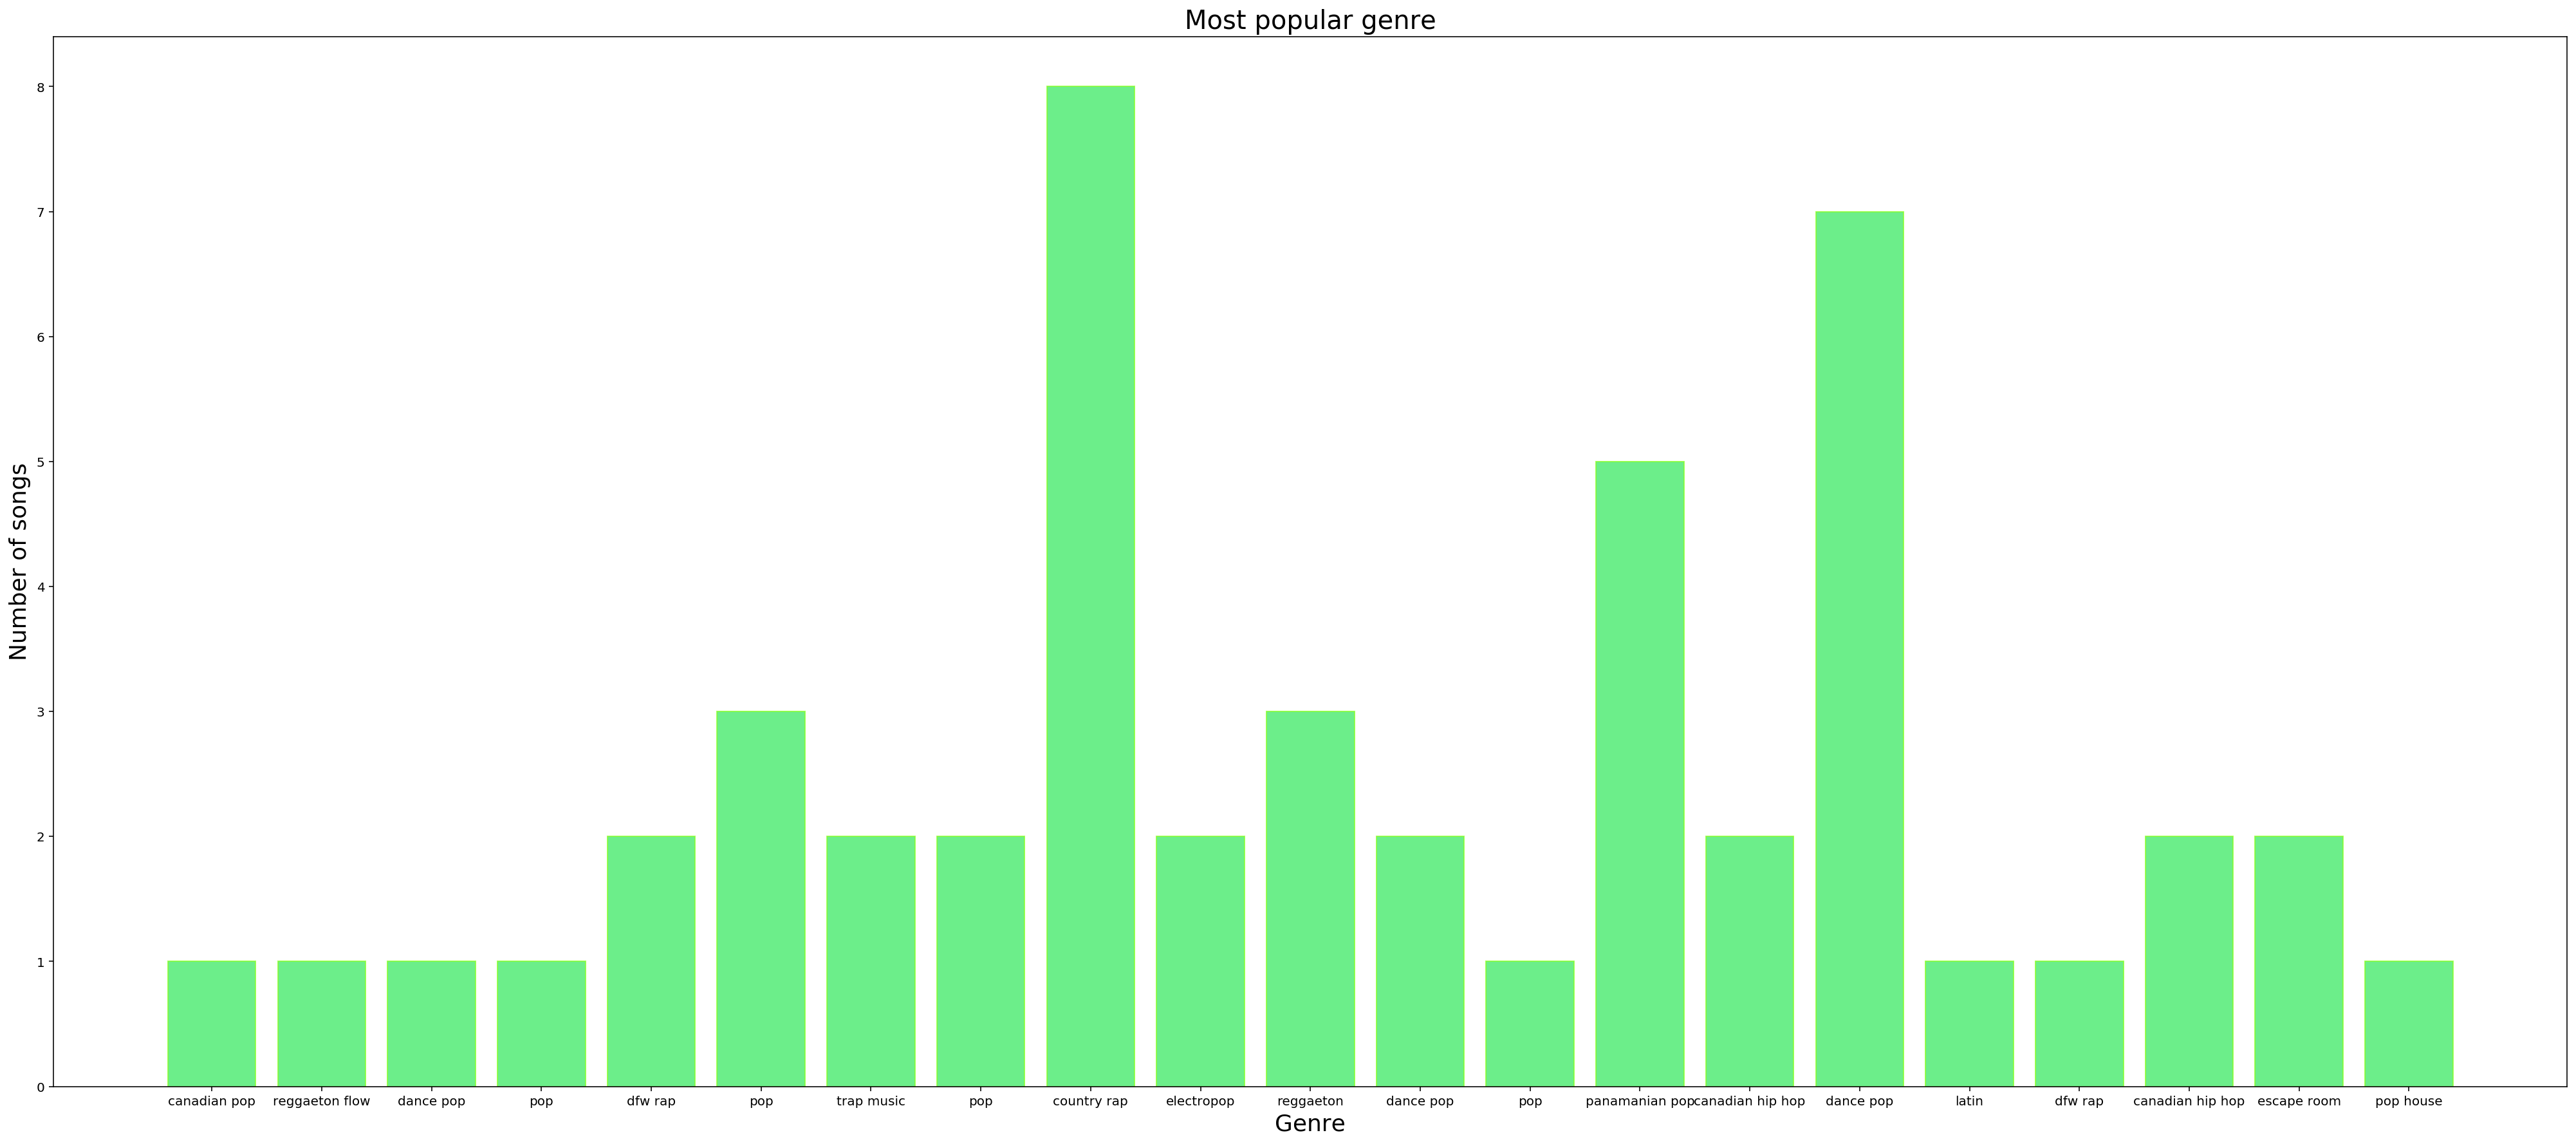

In [21]:
#create column chart show 
color = cm.Greens(np.linspace(.7, .2 , 40))
color
fig, ax=plt.subplots(figsize=(35,15))
length=np.arange(len(popular_genre))
plt.bar(length,popular_genre, color = '#2EE759' ,edgecolor='#84FF1E',alpha=0.7)
plt.xticks(length,genre_list)
plt.title('Most popular genre',fontsize=20)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Number of songs',fontsize=18)
plt.show()

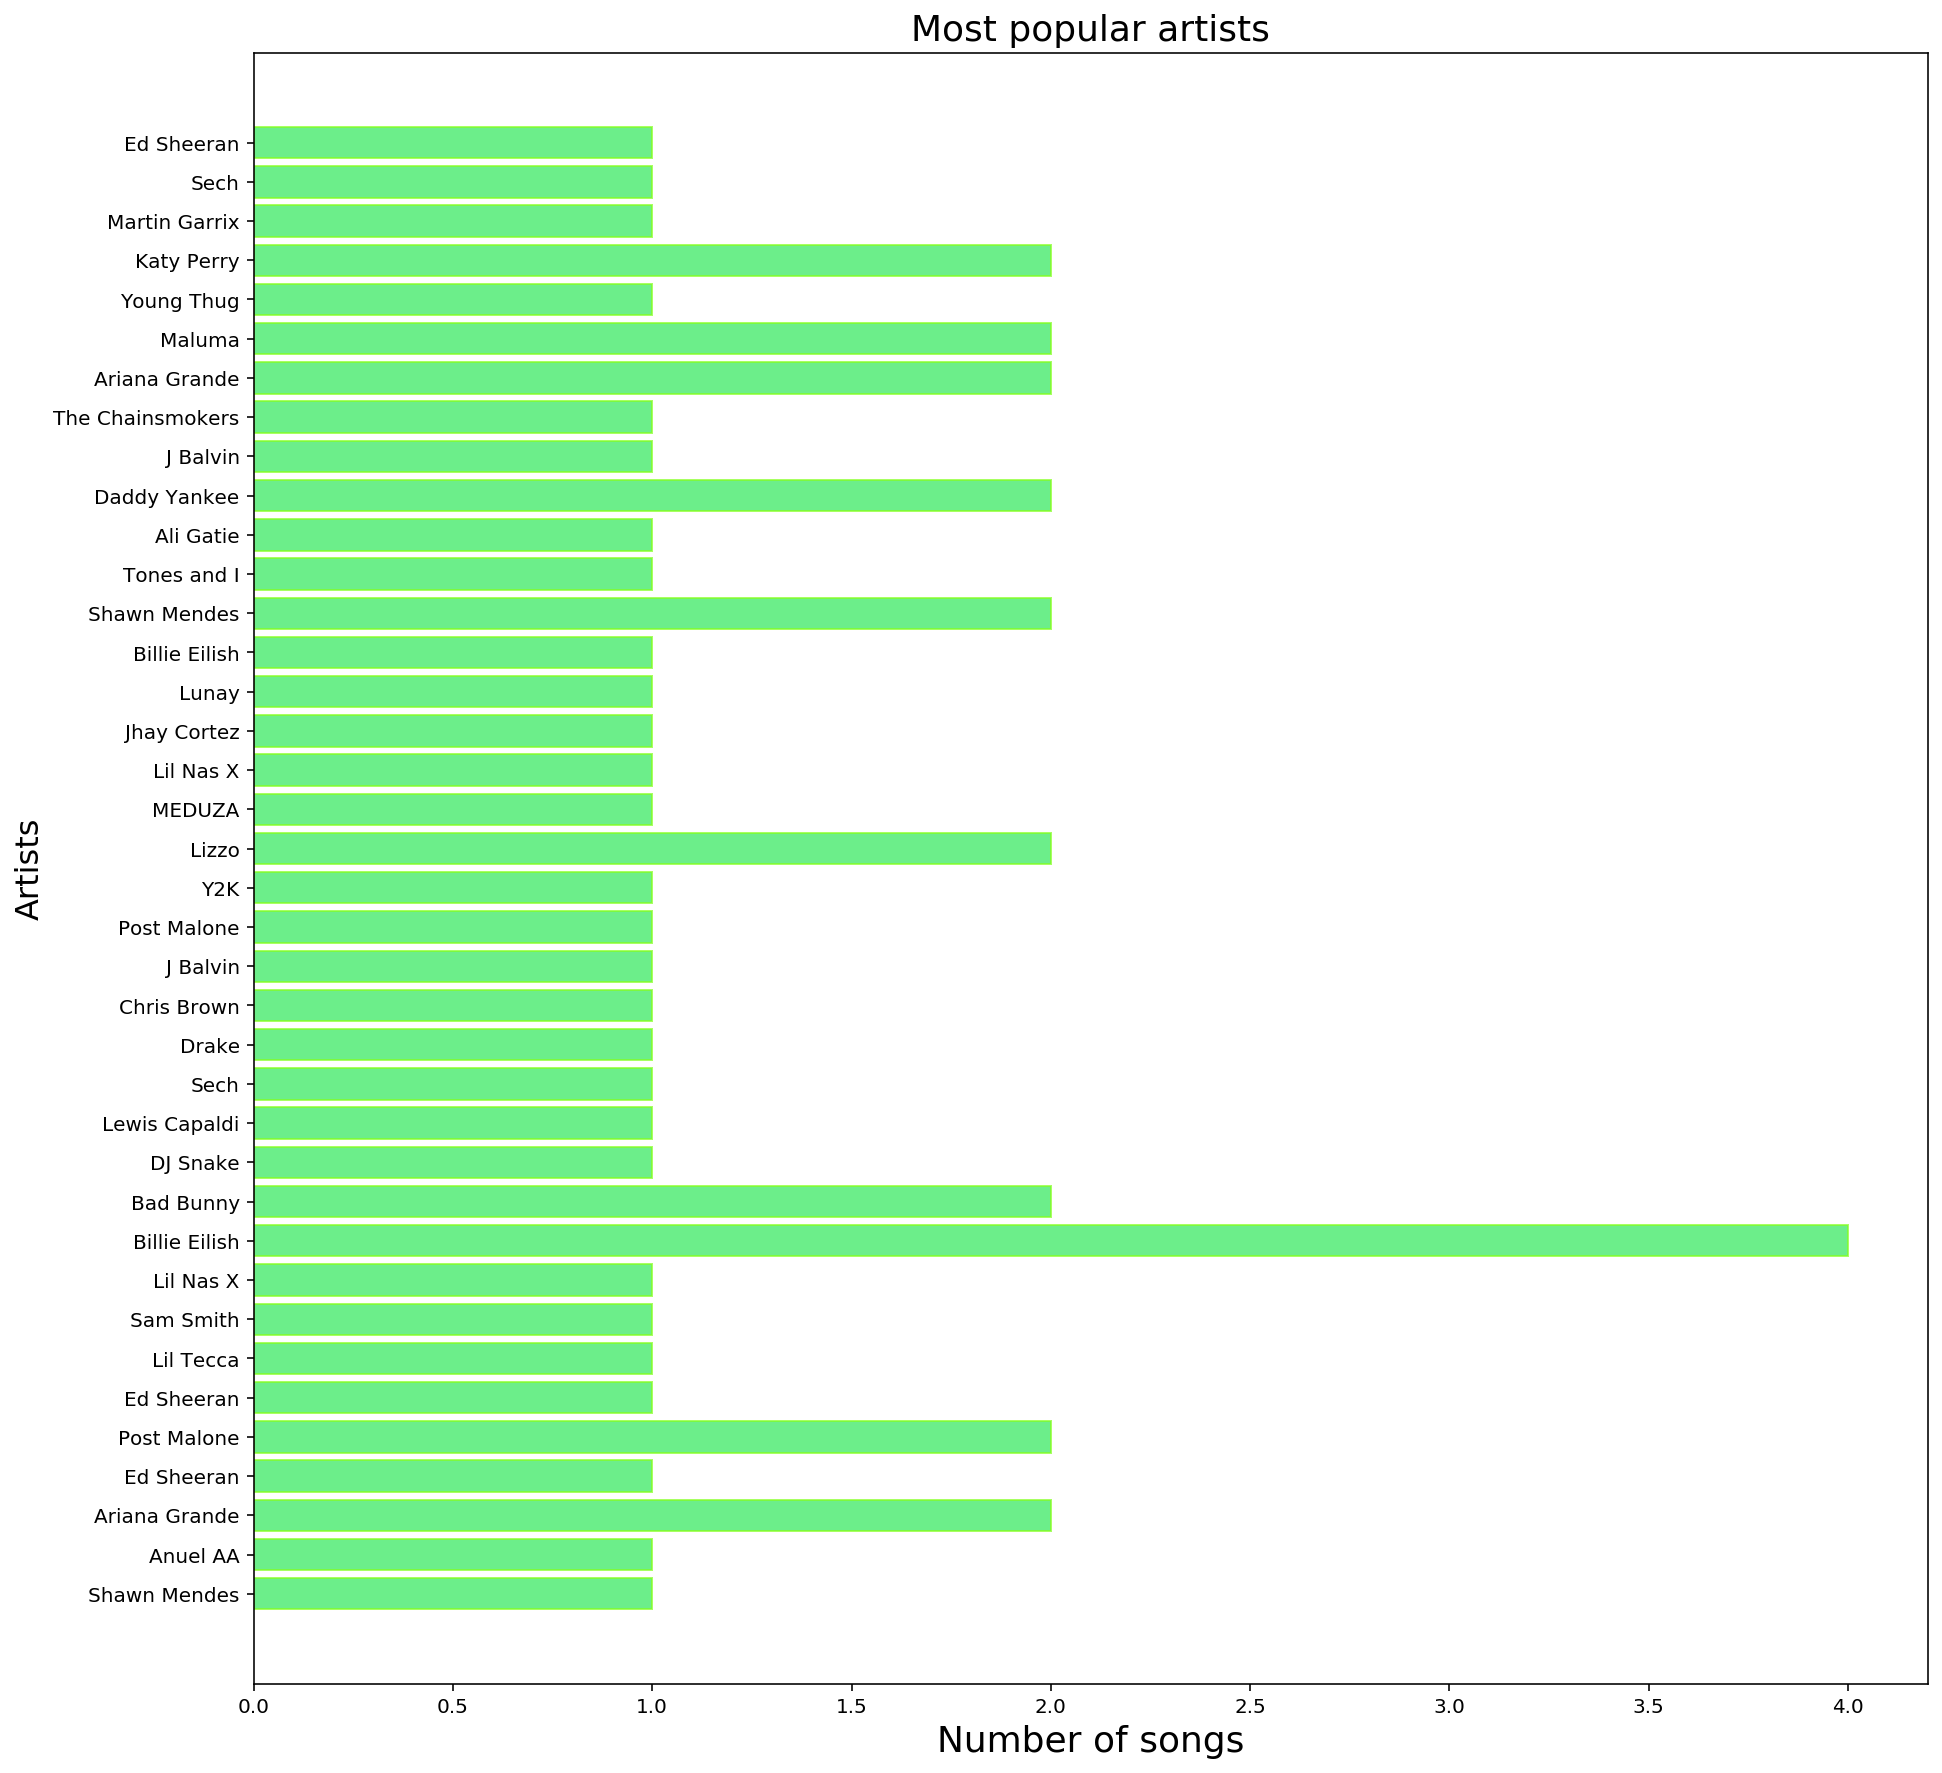

In [22]:
fig, ax=plt.subplots(figsize=(15,15))
length=np.arange(len(artist))
plt.barh(length,artist,color= '#2EE759',edgecolor='#84FF1E',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=18)
plt.show()

In [23]:
#Find correlation
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  Unnamed: 0  beats_per_minute  Energy  Danceability  loudness(dB)  Liveness  \
Unnamed: 0             1.000            -0.263   0.132         0.053        -0.014     0.102   
beats_per_minute      -0.263             1.000   0.012        -0.092         0.014    -0.033   
Energy                 0.132             0.012   1.000        -0.049         0.635     0.013   
Danceability           0.053            -0.092  -0.049         1.000         0.009    -0.261   
loudness(dB)          -0.014             0.014   0.635         0.009         1.000     0.114   
Liveness               0.102            -0.033   0.013        -0.261         0.114     1.000   
valence                0.113            -0.048   0.467         0.155         0.317    -0.187   
length                 0.045            -0.198   0.189        -0.079         0.165     0.202   
acousticness           0.058            -0.010  -0.211        -0.128        -0.040     0.204   
speechiness           -0.232            

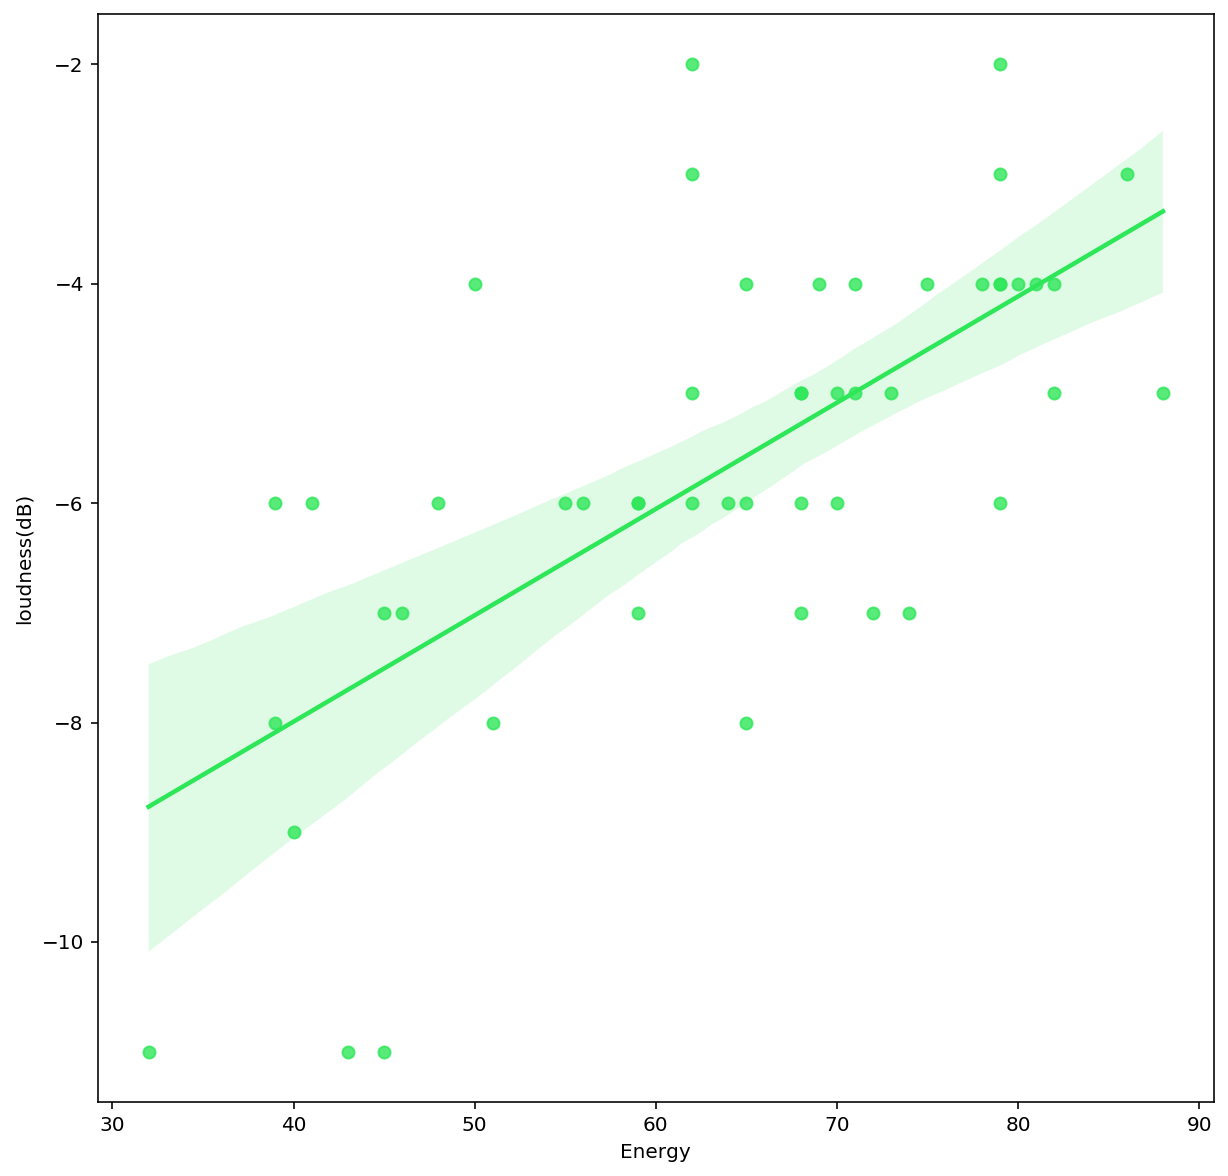

In [24]:
#Find the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='loudness(dB)',data=df,color= '#2EE759')

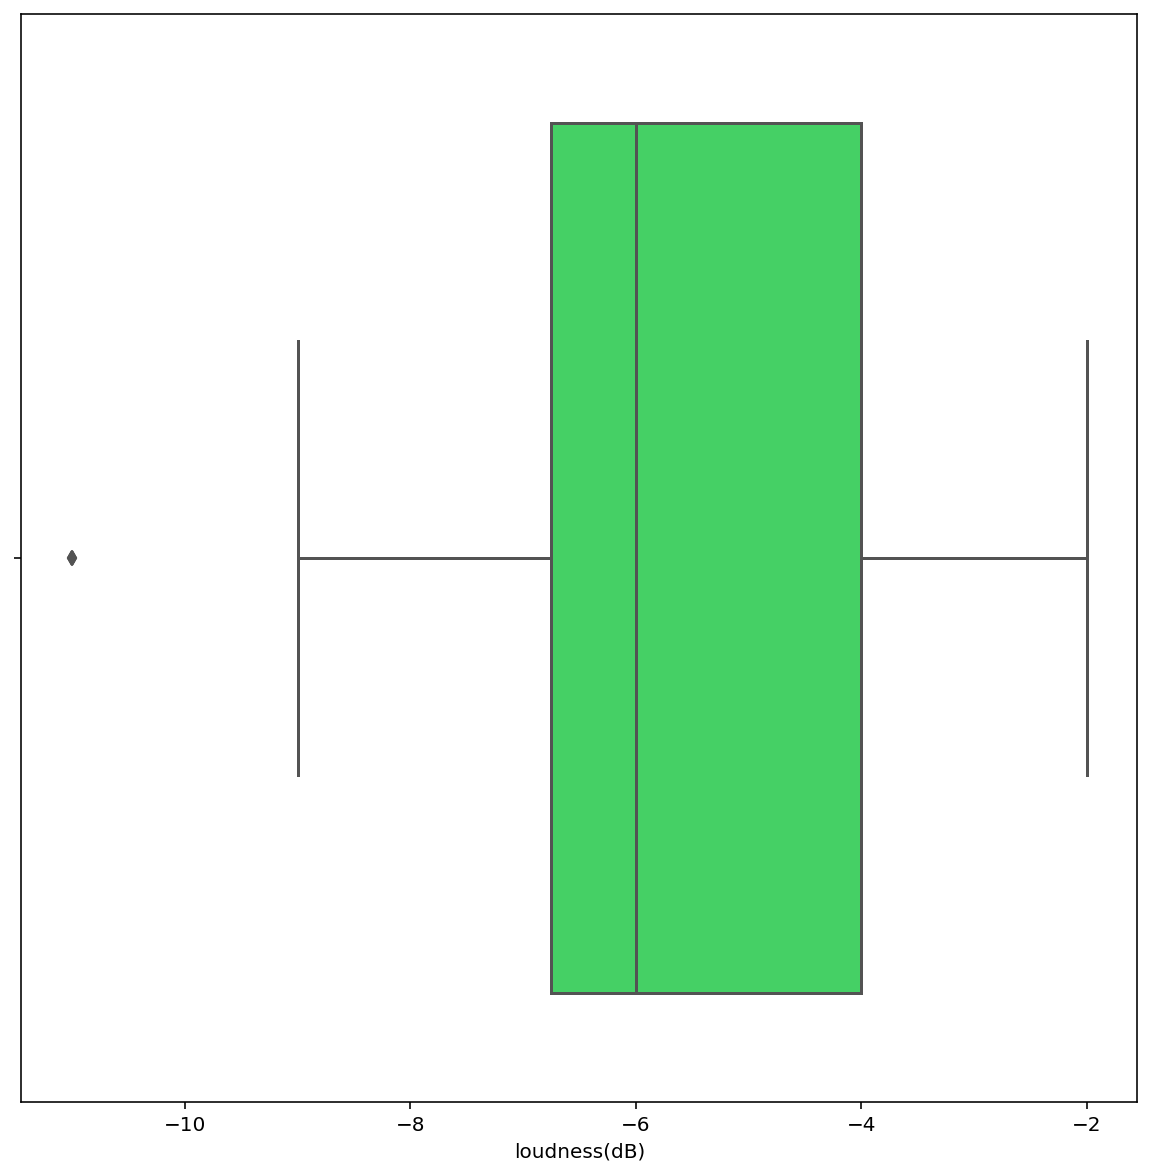

In [25]:
#check outlier use boxplot 
sns.boxplot(x=df['loudness(dB)'],data=df,color='#2EE759')
plt.gcf().set_size_inches(10,10)
plt.show()